# 시간이 흘러가면서 평균과 분산이 일정하면 stationary series
# 일정하지 않으면 non-stationary series => 시계열 예측에 활용됨!
# 따라서 먼저 stationary인지 non인지 확인할 필요!

# 시계열 데이터의 경우 자기 상관이 주로 발생한다

자기상관(autocorrelation) : 고전적 회귀모형의 기본가정중에 오차항(εi)들은 서로 (1차함수적) 상관관
계에 있지않다( E[εi εj] =0, i ≠j)라고 하는 가정이 성립되지 않은 현상

 자기상관 현상은 연속적인 일련의 관측치들이 서로 상관되어 있을 때, 하
나의 잔차항의 크기가 이웃하는 다른 잔차항의 크기와 서로 일정한 관련이 있을
때 일어난다. 

In [1]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# parse_dates=['Date'] : 타입이 있는 것은 바로 datetime형으로 바꿀 수 있음

birthDF = pd.read_csv('../data5/daily-total-female-births.txt', parse_dates=['Date'], index_col='Date') 
birthDF

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [3]:
birthDF.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [4]:
airDF = pd.read_csv('../data5/international-airline-passengers.txt', parse_dates=['time'], index_col='time')
airDF

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
airDF.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='time', length=144, freq=None)

In [6]:
tempDF = pd.read_csv('../data5/daily-min-temperatures.csv', parse_dates=['Date'], index_col='Date')
tempDF

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


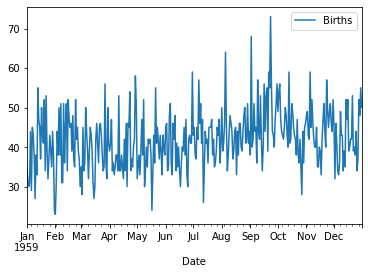

In [7]:
birthDF.plot()
plt.show()

## => stationary series

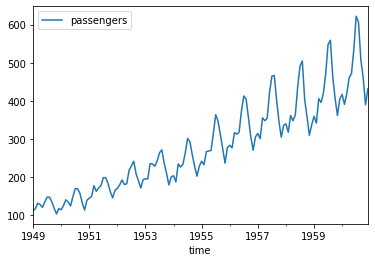

In [8]:
airDF.plot()
plt.show()

## => non-stationary series

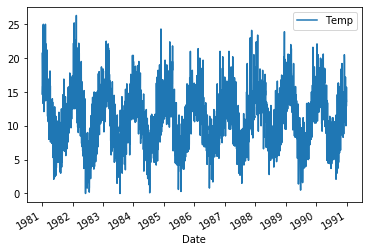

In [9]:
tempDF.plot()
plt.show()

## => 주기성을 가지고 있음
## => 애매하면 stationary인지 non-stationary인지 판단하는 것이 있다! 그게 뭘까?

# 자기상관

### 두 등분으로 나누어서 평균값 알아보기 

#### stationary

In [10]:
# 평균과 분산이 일정

n = int(len(birthDF)/2)
print(birthDF.iloc[:n].mean())
print(birthDF.iloc[n:].mean())
print(birthDF.iloc[:n].var())
print(birthDF.iloc[n:].var())

Births    39.763736
dtype: float64
Births    44.185792
dtype: float64
Births    49.485308
dtype: float64
Births    48.976281
dtype: float64


#### non-stationary

In [11]:
# 평균과 분산이 일정하지 않음

n = int(len(airDF)/2)
print(airDF.iloc[:n].mean())
print(airDF.iloc[n:].mean())
print(airDF.iloc[:n].var())
print(airDF.iloc[n:].var())

passengers    182.902778
dtype: float64
passengers    377.694444
dtype: float64
passengers    2275.69464
dtype: float64
passengers    7471.736307
dtype: float64


#### stationary?

In [12]:
# 평균과 분산이 일정하게 보이지만 주기성을 띄고 있기 때문에 애매!!!

n = int(len(tempDF)/2)
print(tempDF.iloc[:n].mean())
print(tempDF.iloc[n:].mean())
print(tempDF.iloc[:n].var())
print(tempDF.iloc[n:].var())

Temp    11.043507
dtype: float64
Temp    11.312
dtype: float64
Temp    18.170782
dtype: float64
Temp    14.961956
dtype: float64


### 본격적으로 자기상관을 알아보자!

In [13]:
tempDF['days'] = range(0, len(tempDF))
tempDF

,Temp,days
Date,,
1981-01-01,20.7,0
1981-01-02,17.9,1
1981-01-03,18.8,2
1981-01-04,14.6,3
1981-01-05,15.8,4
...,...,...
1990-12-27,14.0,3645
1990-12-28,13.6,3646
1990-12-29,13.5,3647


In [14]:
temps = tempDF['Temp'].values
days = tempDF['days'].values

In [15]:
# Temp와 days와의 상관관계

tempDF.corr()

,Temp,days
Temp,1.00000,0.01218
days,0.01218,1.00000


In [16]:
# 넘파이도 가능
# 대신 ndarray로 만들어 주고

np.corrcoef(temps, days)

array([[1.        , 0.01218004],
       [0.01218004, 1.        ]])

In [17]:
temps

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [18]:
temps[1:]

array([17.9, 18.8, 14.6, ..., 13.5, 15.7, 13. ])

In [19]:
temps[:-1]

array([20.7, 17.9, 18.8, ..., 13.6, 13.5, 15.7])

In [20]:
# 자기 상관
# lag1

np.corrcoef( temps[1:], temps[:-1] )[0, 1] # 0행 1열

0.7748702165384456

In [21]:
# lag2

np.corrcoef( temps[2:], temps[:-2] )[0, 1]

0.6311194620684837

In [22]:
# lag3

np.corrcoef( temps[3:], temps[:-3] )[0, 1]

0.5863748620126278

In [23]:
autocorrelation=[]
for shift in range(1,10):
    c = np.corrcoef(temps[:-shift], temps[shift:] )[0,1]
    autocorrelation.append( c )
autocorrelation

# 전체적으로 값이 줄어들고 있는 것을 볼 수 있음

[0.7748702165384457,
 0.6311194620684836,
 0.5863748620126278,
 0.5788976133377621,
 0.578571574411206,
 0.5765484145122557,
 0.575928953583158,
 0.5695569780397494,
 0.5634747178408281]

## 함수 호출로 자기상관 구하기

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, acf

In [25]:
result = acf( tempDF['Temp'] )
result

array([1.        , 0.774268  , 0.6302866 , 0.58529312, 0.57774567,
       0.57728013, 0.57510412, 0.57437039, 0.56782622, 0.56120131,
       0.54668689, 0.53793111, 0.54012564, 0.54247126, 0.53688723,
       0.53429917, 0.53043593, 0.52911166, 0.53037444, 0.52280732,
       0.52303677, 0.52224579, 0.51426684, 0.49837745, 0.49302665,
       0.49946731, 0.50428521, 0.50068173, 0.49157081, 0.48146406,
       0.47421245, 0.47568054, 0.46311862, 0.46215585, 0.46630567,
       0.45459092, 0.43378232, 0.4203594 , 0.42707505, 0.42196486,
       0.4079607 ])

- 그래프로 그려보자

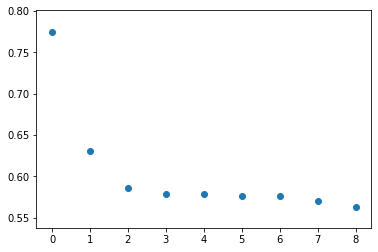

In [26]:
plt.scatter( range(0, len(autocorrelation)), autocorrelation) 
plt.show()

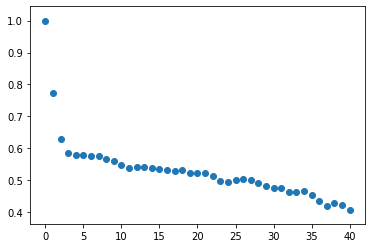

In [27]:
plt.scatter( range(0, len(result)), result) 
plt.show()

## 함수로 자기상관계수값 구해주고 scatter로 그려줌

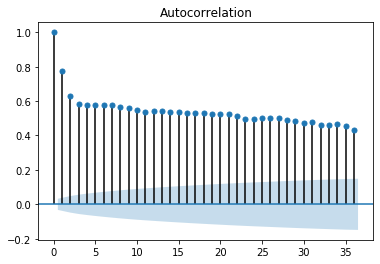

In [28]:
plot_acf( tempDF['Temp'])
plt.show()

# non-stationary

### => tempDF는 non-stationary => 어떤 변동이 없음

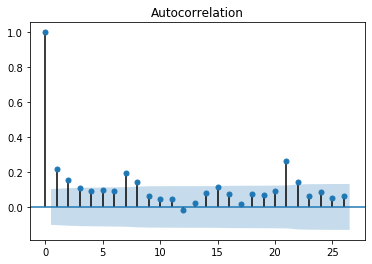

In [29]:
plot_acf( birthDF['Births'])
plt.show()


### => stationary

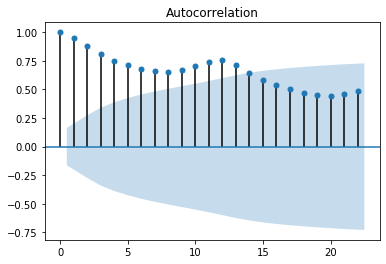

In [30]:
plot_acf( airDF['passengers'])
plt.show()

### => stationary

# non-stationary 여야 시계열로 할 수 있음

# 그래프를 그려서 arima냐 .. 모델을 선택하는데 실제 현업에서는 for문을 돌려서 적당한 파라미터값을 찾음

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf

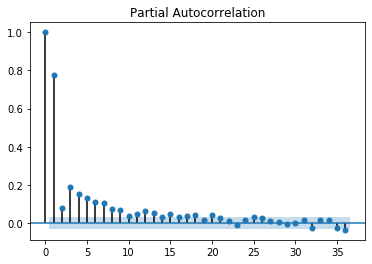

In [32]:
plot_pacf(tempDF['Temp'])
plt.show()

## stationary인지 아닌지 판단 지표 : adfuller 판단지표

#### 검증 조건 ( p-value : 5% 이내면 reject으로 대체가설 선택됨 )
- 귀무가설(H0): non-stationary.
- 대체가설 (H1): stationary.


In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
result = adfuller(birthDF['Births'])
print(result[0]) # adf (작을 수록 귀무가설을 기각시킬 확률이 높다)
print(result[1]) # p-value

# 귀무가설 기각 => stationary

-4.808291253559763
5.243412990149865e-05


In [35]:
result = adfuller(airDF['passengers'])
print(result[0]) # adf (값이 클수록 귀무가설을 채택할 확률이 높다)
print(result[1]) # p-value

# 귀무가설 채택 => non-stationary

0.8153688792060569
0.9918802434376411


# 차분 : non-stationary => stationary로 바꿔줌
# 보통 1, 2면 바껴짐 maximum 3정도!

# <모델>
# 1. 자기 회귀 : AR(AutoReggression)
# 목표예상변수에 대해 과거 값을 이용

# 2. MA(Moving Average)
# 과거 예측오차 이용

# 3. ARMA

# 4. ARIMA Model

In [37]:
# model = ARIMA(airDF, (2, 1, 2)) # p, d, q값을 튜플로 주기
# model.fit()

order = (2, 1, 2)
model = ARIMA(airDF, order) # p, d, q값을 튜플로 주기
rfit = model.fit()
rfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.716
Date:                Wed, 27 Jan 2021   AIC                           1344.043
Time:                        11:40:18   BIC                           1361.821
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.passengers    -1.9097      0.065    -29.503      0.000      -2.037      -1.783
ma.L2.D.passengers     0.9995      0.068     14.807      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9553           -0.2965j            1.0002           -0.0479
MA.2            0.9553           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

#### AIC : 낮을 수록 좋음

## 실제로는 함수를 돌려서 AIC값이 제일 작은 모델을 선택한다!

In [38]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df


In [39]:
arima_aic_check(airDF, [3, 3, 3])

,order,AIC
21,p:2 d:1 q:2,1344.043433
20,p:2 d:1 q:1,1361.695808
13,p:1 d:1 q:2,1371.815374
15,p:1 d:2 q:2,1393.908442
23,p:2 d:2 q:2,1394.656208
7,p:0 d:2 q:2,1396.371696
19,p:2 d:1 q:0,1397.975152
4,p:0 d:1 q:2,1398.385532
3,p:0 d:1 q:1,1398.827110
12,p:1 d:1 q:1,1402.145400


In [40]:
# 1월부터 12월까지 예측
# 예측값을 줄 때 처음과 끝 날짜 적어주기

rfit.predict(1, 10, typ='levels')

1949-02-01    114.531108
1949-03-01    121.350912
1949-04-01    137.221378
1949-05-01    129.789534
1949-06-01    119.169402
1949-07-01    136.762428
1949-08-01    149.739116
1949-09-01    147.367344
1949-10-01    134.798650
1949-11-01    121.076971
Freq: MS, dtype: float64

In [41]:
# 문자열도 가능

rfit.predict('1949-02-01', '1949-11-01 ', typ='levels')

1949-02-01    114.531108
1949-03-01    121.350912
1949-04-01    137.221378
1949-05-01    129.789534
1949-06-01    119.169402
1949-07-01    136.762428
1949-08-01    149.739116
1949-09-01    147.367344
1949-10-01    134.798650
1949-11-01    121.076971
Freq: MS, dtype: float64

In [42]:
train = airDF[:'1960-07-01']
test = airDF['1960-07-01':]

In [43]:
test

,passengers
time,
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [44]:
train

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-03-01,419
1960-04-01,461
1960-05-01,472


In [45]:
# preds = rfit.predict('1960-07-01', '1960-12-01 ', typ='levels')

In [49]:
preds = rfit.predict('1960-07-01', '1961-07-01 ', typ='levels')

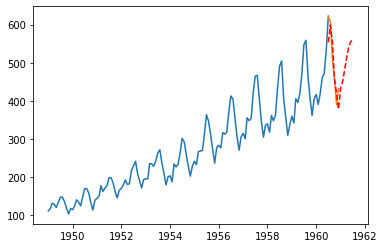

In [50]:
plt.plot(train)
plt.plot(test)
plt.plot(preds, 'r--')
plt.show()

# 실제랑 예측값이랑 거의 비슷함

In [48]:
airDF

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# <연습문제>

In [59]:
df = pd.DataFrame([
        ['2001-11-01', 0.998543],
        ['2001-11-02', 1.914526],
        ['2001-11-03', 3.057407],
        ['2001-11-04', 4.044301],
        ['2001-11-05', 4.952441],
        ['2001-11-06', 6.002932],
        ['2001-11-07', 6.930134],
        ['2001-11-08', 8.011137],
        ['2001-11-09', 9.040393],
        ['2001-11-10', 10.097007],
        ['2001-11-11', 11.063742],
        ['2001-11-12', 12.051951],
        ['2001-11-13', 13.062637],
        ['2001-11-14', 14.086016],
        ['2001-11-15', 15.096826],
        ['2001-11-16', 15.944886],
        ['2001-11-17', 17.027107],
        ['2001-11-18', 17.930240],
        ['2001-11-19', 18.984202],
        ['2001-11-20', 19.971603]
    ], columns=['date', 'count'])
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.set_index('date')
print(df)

                count
date                 
2001-11-01   0.998543
2001-11-02   1.914526
2001-11-03   3.057407
2001-11-04   4.044301
2001-11-05   4.952441
2001-11-06   6.002932
2001-11-07   6.930134
2001-11-08   8.011137
2001-11-09   9.040393
2001-11-10  10.097007
2001-11-11  11.063742
2001-11-12  12.051951
2001-11-13  13.062637
2001-11-14  14.086016
2001-11-15  15.096826
2001-11-16  15.944886
2001-11-17  17.027107
2001-11-18  17.930240
2001-11-19  18.984202
2001-11-20  19.971603


In [60]:
df

,count
date,
2001-11-01,0.998543
2001-11-02,1.914526
2001-11-03,3.057407
2001-11-04,4.044301
2001-11-05,4.952441
2001-11-06,6.002932
2001-11-07,6.930134
2001-11-08,8.011137
2001-11-09,9.040393


In [61]:
# 2011-11-13 기준으로 train, test 나누기
train=df[:'2001-11-12']
test=df['2001-11-13':]

## acf, adfuller, 예측(2001-11-13, 2001-11-20)

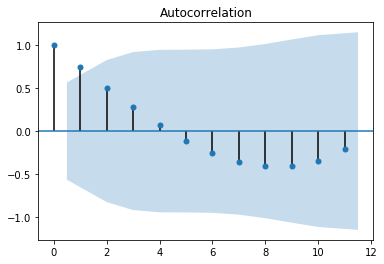

In [62]:
# acf로 non-stationary 여부 확인
plot_acf(train['count'])
plt.show() # non-stationary

In [63]:
# adfuller로 non-stationary 여부 확인
result=adfuller(train['count'])
print(result[0])
print(result[1]) # p-value 값 0.93 -> 귀무가설 채택 -> non-stationary

-0.27270603132497123
0.9292820059517106


In [64]:
# 가장 작은 AIC 만드는 ARIMA 조합 찾기
arima_aic_check(train, [3,3,3]) # 0, 1, 1 선택

,order,AIC
4,p:0 d:1 q:1,-26.732532
5,p:0 d:1 q:2,-24.732845
10,p:1 d:1 q:0,-23.740628
3,p:0 d:1 q:0,-22.957058
13,p:2 d:1 q:0,-22.471244
8,p:0 d:2 q:2,-16.234061
7,p:0 d:2 q:1,-15.186843
14,p:2 d:2 q:0,-13.355062
11,p:1 d:2 q:0,-12.757724
6,p:0 d:2 q:0,-9.447776


In [65]:
# ARIMA 모델 학습
order=(0,1,1)
model=ARIMA(train, order)
model.fit()

In [66]:
# 예측 및 그래프로 나타내기
pred=model.fit().predict('2001-11-13', '2001-11-20', typ="levels")

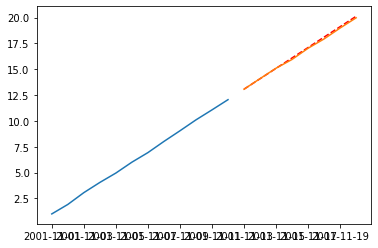

In [67]:
plt.plot(train) 
plt.plot(pred, 'r--') # 실제 데이터(test)와 거의 일치
plt.plot(test)
plt.show()